<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_56/blob/main/Entrega_1_(16_11)_%3E_Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY**
 

 
**Maestría en Inteligencia Artificial**

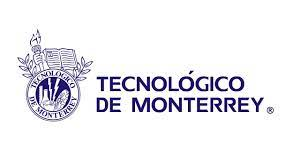

**Presenta:**
**Actividad Semanal 8**

**Tema:**
**Limpieza, análisis, visualización y kmeans**

**Materia:**
<!--  -->
**TC4029.10 - Ciencia y Análitica de Datos**

**Profesor Titular:**
**Dra. María de la Paz Rico Fernández**

**Alumno:**

*   **A01793625 - Luis Angel Hermenegildo Dominguez**
*   **A01332665 - Hector Montañez Alvarez**




**noviembre de 2022**


In [ ]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
#!pip install geopandas
#!pip install qeds

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform, quantile_transform
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import seaborn as sns 
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from shapely.geometry import Point
import geopandas as gpd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [224]:
#url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
datos = pd.read_csv(url1,encoding = "ISO-8859-1")
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Se comprueba que no hay valores nulos en el dataset

In [200]:
datos.shape

(1068, 57)

In [225]:
datos.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [202]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [226]:
datos['CALIDAD_MN'].describe()

datos['CALIDAD_MN'].value_counts()

Potable - Excelente                                  982
Puede afectar la salud                                50
Sin efectos en la salud - Puede dar color al agua     36
Name: CALIDAD_MN, dtype: int64

In [204]:
datos.shape

(1068, 57)

In [227]:
datos.drop(columns=['SDT_mg/L','CLAVE','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SITIO','PERIODO'], inplace=True)

In [228]:
#datos.isnull().values.any()
datos[datos.isna().any(axis=1)]

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,POZO,-102.022100,22.208870,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,POZO,-102.200750,21.999580,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
3,POZO,-102.294490,22.184350,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
6,POZO,-110.213960,23.474600,203.670,Alta,531.0,Buena para riego,278.8,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
8,POZO,-110.088778,23.799861,343.655,Alta,1114.0,Permisible para riego,672,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,POZO,-99.779110,25.533690,284.700,Alta,1208.0,Permisible para riego,745.4,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1057,POZO,-100.364400,25.675370,267.180,Alta,850.0,Permisible para riego,488.8,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1059,POZO,-99.838100,25.557590,374.490,Alta,1225.0,Permisible para riego,655,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1066,POZO,-100.326830,24.801180,193.140,Alta,873.0,Permisible para riego,690.6667,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#Obtenemos los nombres de las columnas 

#list(datos.columns)

In [229]:
# imputacion por moda - Categóricos
datos_cat = ['CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
              'CALIDAD_CD','CALIDAD_CR', 'CALIDAD_HG','CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES'   ]

# imputacion por moda - Continuos
datos_cnt = ['LONGITUD', 'LATITUD' ,'ALC_mg/L', 'SDT_M_mg/L' ,'CONDUCT_mS/cm' ,'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L']

# imputacion por moda - Binarios
datos_bin = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF','CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR',
             'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN' , 'CUMPLE_CON_FE' ]

In [230]:
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cat_pipeline_names = datos_cat

cnt_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cnt_pipeline_names = datos_cnt

bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
bin_pipeline_names = datos_bin

In [231]:
columnTransfomer = ColumnTransformer(transformers = [('catpimp', cat_pipeline, cat_pipeline_names),
                                                       ('cntimp', cnt_pipeline, cnt_pipeline_names),
                                                       ('binimp', bin_pipeline, bin_pipeline_names)
                                                       ],
                                       remainder='passthrough')
#pipeline = make_pipeline(columnTransfomer)

In [232]:
#ndf = columnTransfomer.fit_transform(datos)

#columnTransfomer.get_feature_names_out
#df = pd.DataFrame(ndf )
#df = pd.DataFrame(ndf, columns=columnTransfomer.get_feature_names_out())
#df

#Se realizan reemplazo de valores nulos
datos = datos.fillna(datos.mode().iloc[0])

datos

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,POZO,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,POZO,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,POZO,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,POZO,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,POZO,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,POZO,-99.54191,24.76036,231.045,Alta,2350.0,Dudosa para riego,1545.8,Cultivos con manejo especial,Ligeramente salobres,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,POZO,-99.70099,24.78280,256.000,Alta,529.0,Buena para riego,297,Excelente para riego,Potable - Dulce,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,POZO,-99.82249,25.55197,330.690,Alta,2600.0,Dudosa para riego,1873,Cultivos con manejo especial,Ligeramente salobres,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,POZO,-100.32683,24.80118,193.140,Alta,873.0,Permisible para riego,690.6667,Cultivos sensibles,Potable - Dulce,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [238]:
datos = datos.astype({"SDT_M_mg/L": float})

ValueError: ignored

In [236]:
datos[SDT_M_mg/L].astype('float64').dtypes

NameError: ignored

In [235]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBTIPO               1068 non-null   object 
 1   LONGITUD              1068 non-null   float64
 2   LATITUD               1068 non-null   float64
 3   ALC_mg/L              1068 non-null   float64
 4   CALIDAD_ALC           1068 non-null   object 
 5   CONDUCT_mS/cm         1068 non-null   float64
 6   CALIDAD_CONDUC        1068 non-null   object 
 7   SDT_M_mg/L            1068 non-null   object 
 8   CALIDAD_SDT_ra        1068 non-null   object 
 9   CALIDAD_SDT_salin     1068 non-null   object 
 10  FLUORUROS_mg/L        1068 non-null   object 
 11  CALIDAD_FLUO          1068 non-null   object 
 12  DUR_mg/L              1068 non-null   object 
 13  CALIDAD_DUR           1068 non-null   object 
 14  COLI_FEC_NMP/100_mL   1068 non-null   object 
 15  CALIDAD_COLI_FEC     

In [233]:
##Validar si aún existen valores vacios
datos.isnull().values.any()


False

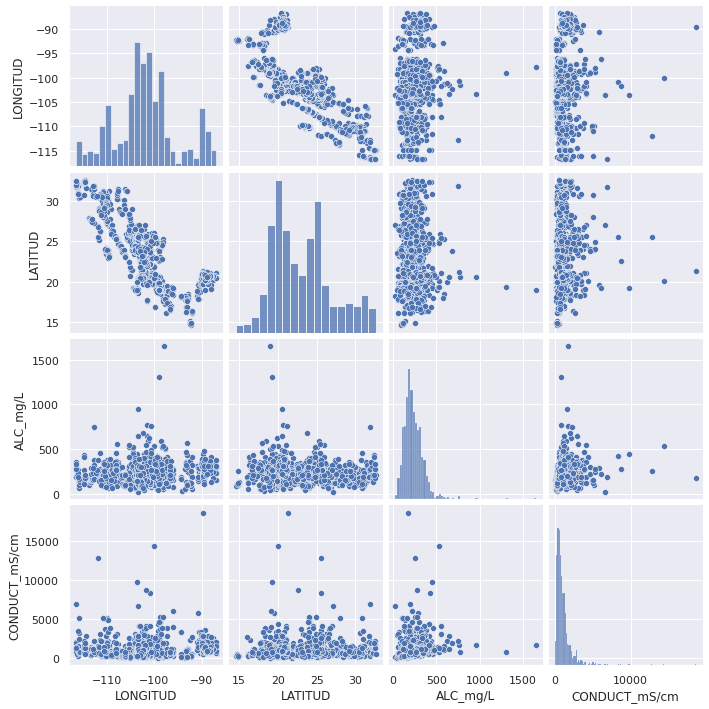

In [234]:
#Visualización de la dispersión de los datos y correlación
sns.pairplot(datos)

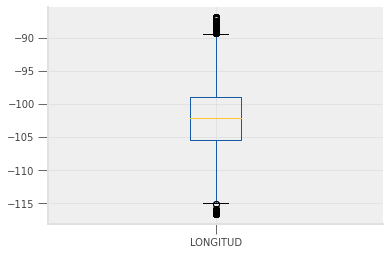

In [ ]:
#Se generan gráficos BOXPLOT

datos.boxplot(column=['LONGITUD'])  

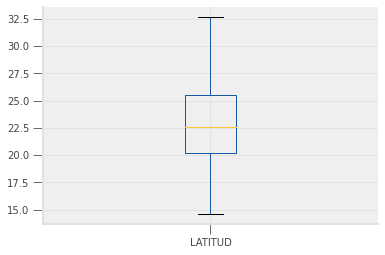

In [ ]:
datos.boxplot(column=['LATITUD'])

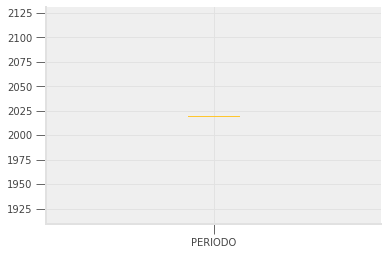

In [ ]:
datos.boxplot(column=['PERIODO'])

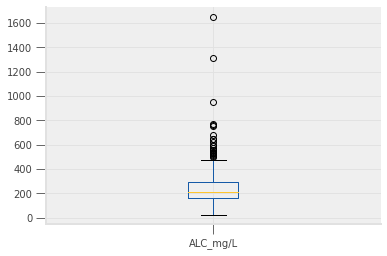

In [ ]:
datos.boxplot(column=['ALC_mg/L'])

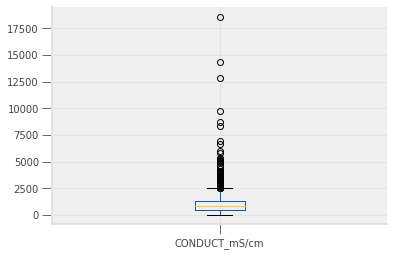

In [ ]:
datos.boxplot(column=['CONDUCT_mS/cm'])

In [ ]:
datos.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
LONGITUD,1.000000,-0.760204,NaN,0.167877,0.062054
LATITUD,-0.760204,1.000000,NaN,-0.079951,0.053043
PERIODO,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.167877,-0.079951,NaN,1.000000,0.217574
CONDUCT_mS/cm,0.062054,0.053043,NaN,0.217574,1.000000


In [ ]:
CALIDAD_ALC1 = ['Alta' ,'Media']

CALIDAD_CONDUC1 = ['Permisible para riego' ,'Buena para riego' ,'Dudosa para riego',
                        ]
CALIDAD_SDT_ra1 = ['Cultivos sensibles' ,'Excelente para riego',
                    'Cultivos con manejo especial' ]
CALIDAD_SDT_salin1 = ['Potable - Dulce', 'Ligeramente salobres', ]

CALIDAD_FLUO1 = ['Potable - Optima' ,'Alta' ,'Baja' ,'Media']

CALIDAD_DUR1 = ['Potable - Dura' ,'Potable - Suave', 'Potable - Moderadamente suave' ]

CALIDAD_COLI_FEC1 = ['Potable - Excelente' ,'Aceptable' ,'Buena calidad']

CALIDAD_N_NO31 = ['Potable - Excelente' ,'Potable - Buena calidad' ,'No apta como FAAP' ]

CALIDAD_AS1 = ['Apta como FAAP', 'No apta como FAAP', 'Potable - Excelente']

CALIDAD_MN1 = ['Potable - Excelente' , 'Sin efectos en la salud - Puede dar color al agua']

CALIDAD_FE1 = ['Potable - Excelente' ,'Sin efectos en la salud - Puede dar color al agua']

In [ ]:
#Filtrafo de datos 
newdf_pot = datos.loc[(datos.CALIDAD_MN == 'Potable - Excelente')]
newdf_sin = datos.loc[(datos.CALIDAD_MN == 'Sin efectos en la salud - Puede dar color al agua')]
newdf_pu = datos.loc[(datos.CALIDAD_MN == 'Puede afectar la salud')]



In [ ]:
#Tamano de Potable/ excelente 
newdf_pot.shape

(982, 56)

In [ ]:
#Tamano Sin efectos en la salud - Puede dar color al agua' 
newdf_sin.shape

(36, 56)

In [ ]:
#Tamano 'Puede afectar la salud'' 
newdf_pu.shape

(50, 56)

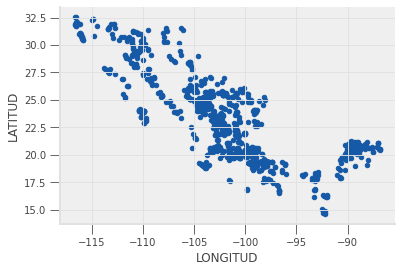

In [ ]:
latlong_pot=newdf_pot[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


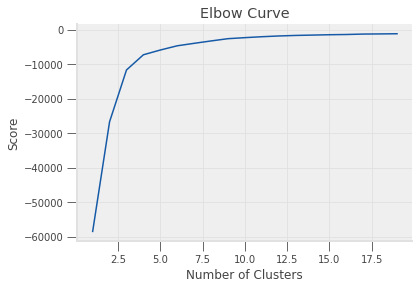

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pot).score(latlong_pot) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(latlong_pot)
centroids_pot = kmeans.cluster_centers_
print(centroids_pot)

[[ -89.96743794   19.71226617]
 [-107.78824727   25.82241918]
 [-100.0934019    19.90126744]
 [-102.5814367    24.24417415]
 [-112.25418009   30.13391374]]


Numer de agrupaciones para agua potable = 5

In [ ]:
latlong_pot["Coordinates"] = list(zip(latlong_pot.LONGITUD, latlong_pot.LATITUD))
latlong_pot["Coordinates"] = latlong_pot["Coordinates"].apply(Point)
gdf_pot = gpd.GeoDataFrame(latlong_pot, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


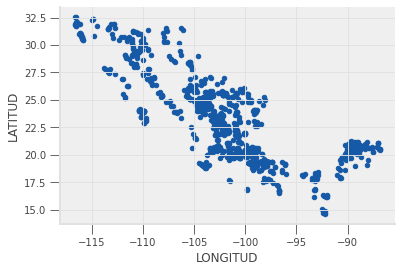

In [ ]:
latlong_sin=newdf_sin[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


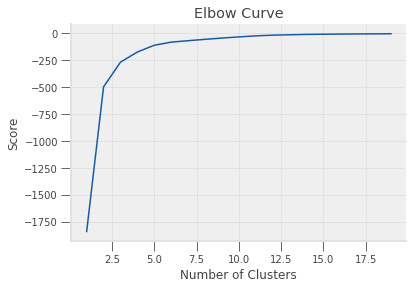

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_sin).score(latlong_sin) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones de =  3 
para grupo Sin efectos en la salud - Puede dar color al agua

In [ ]:
kmeans = KMeans(n_clusters=3).fit(latlong_sin)
centroids_sin = kmeans.cluster_centers_
print(centroids_sin)

[[-114.1748152    32.1619394 ]
 [ -99.0686151    19.9456238 ]
 [-104.68104      21.33039636]]


In [ ]:
latlong_sin["Coordinates"] = list(zip(latlong_sin.LONGITUD, latlong_sin.LATITUD))
latlong_sin["Coordinates"] = latlong_sin["Coordinates"].apply(Point)
gdf_sin = gpd.GeoDataFrame(latlong_sin, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


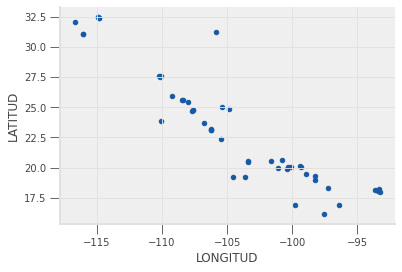

In [ ]:
latlong_pu=newdf_pu[["LONGITUD","LATITUD"]]
latlong_pu.plot.scatter( "LONGITUD","LATITUD")

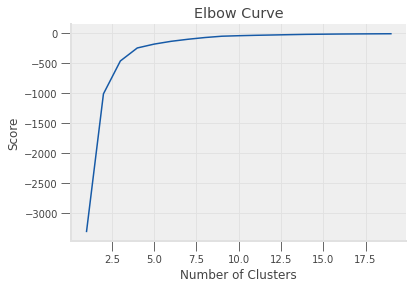

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pu).score(latlong_pu) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones = 5 
para el grupo 'Puede afectar la salud' 

In [ ]:
kmeans = KMeans(n_clusters=5).fit(latlong_pu)
centroids_pu = kmeans.cluster_centers_
print(centroids_pu)

[[-106.418884     23.971429  ]
 [-100.83072025   19.70332119]
 [-115.46716271   32.000323  ]
 [ -94.7724535    17.73327775]
 [-108.93516689   26.70074911]]


In [ ]:
latlong_pu["Coordinates"] = list(zip(latlong_pu.LONGITUD, latlong_pu.LATITUD))
latlong_pu["Coordinates"] = latlong_pu["Coordinates"].apply(Point)
gdf_pu = gpd.GeoDataFrame(latlong_pu, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


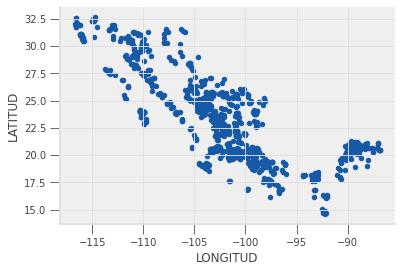

In [ ]:
latlong=datos[["LONGITUD","LATITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
datos["Coordinates"] = list(zip(datos.LONGITUD, datos.LATITUD))
datos["Coordinates"] = datos["Coordinates"].apply(Point)
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [ ]:
gdf = gpd.GeoDataFrame(datos, geometry="Coordinates")
gdf.head()
gdf.shape

(1068, 57)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


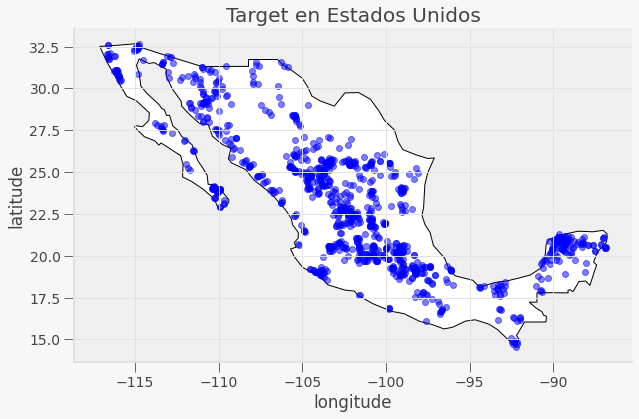

In [ ]:

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

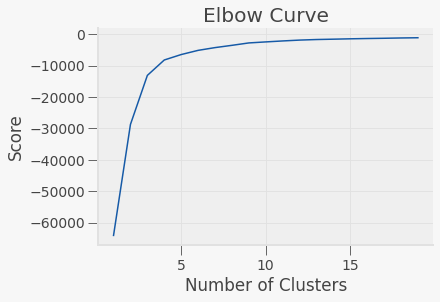

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)

[[-100.12647372   19.82511781]
 [-107.79199926   25.85352689]
 [ -90.09271578   19.6502625 ]
 [-102.57873342   24.20554738]
 [-112.58798516   30.31649148]]


In [ ]:

cent = pd.DataFrame(centroids, columns=["longitude","latitude"])
cent.head(1)
cent.shape
cent.head(5)

,longitude,latitude
0,-100.126474,19.825118
1,-107.791999,25.853527
2,-90.092716,19.650263
3,-102.578733,24.205547
4,-112.587985,30.316491


In [ ]:
cent1 = pd.DataFrame(centroids_pot, columns=["longitude","latitude"])
cent2 = pd.DataFrame(centroids_sin, columns=["longitude","latitude"])
cent3 = pd.DataFrame(centroids_pu, columns=["longitude","latitude"])

In [ ]:
cent1["Coordinates"] = list(zip(cent1.longitude, cent1.latitude))
cent1["Coordinates"] = cent1["Coordinates"].apply(Point)

cent2["Coordinates"] = list(zip(cent2.longitude, cent2.latitude))
cent2["Coordinates"] = cent2["Coordinates"].apply(Point)

cent3["Coordinates"] = list(zip(cent3.longitude, cent3.latitude))
cent3["Coordinates"] = cent3["Coordinates"].apply(Point)

In [ ]:
gdf1 = gpd.GeoDataFrame(cent1, geometry="Coordinates")
gdf2 = gpd.GeoDataFrame(cent2, geometry="Coordinates")
gdf3 = gpd.GeoDataFrame(cent3, geometry="Coordinates")

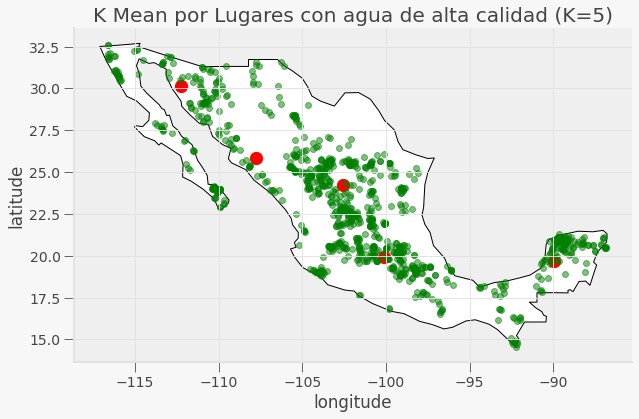

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pot.plot(ax=gax, color='green', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de alta calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

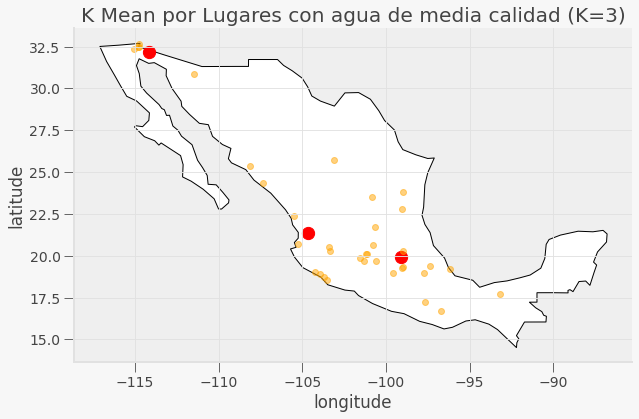

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf2.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_sin.plot(ax=gax, color='orange', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de media calidad (K=3)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

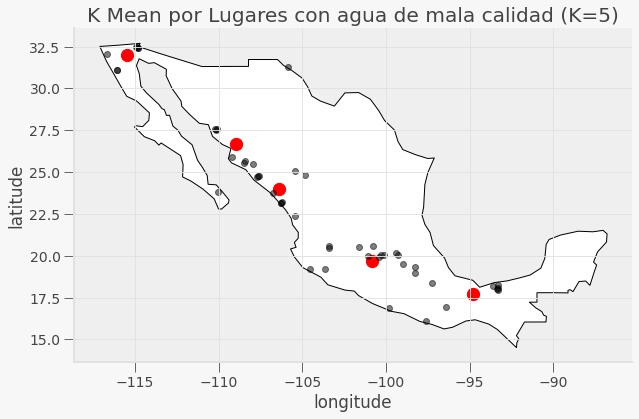

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf3.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pu.plot(ax=gax, color='black', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de mala calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

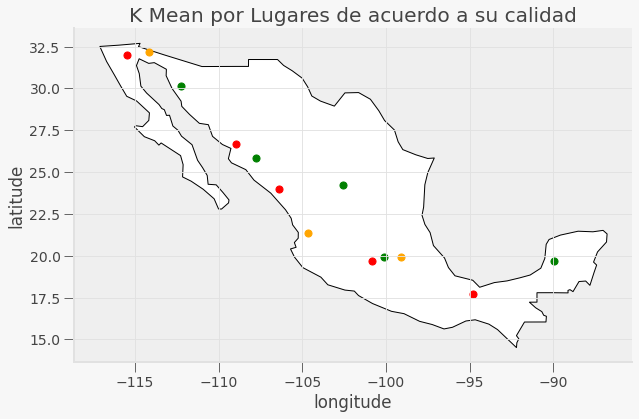

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='green', alpha = 1,markersize=50)
gdf2.plot(ax=gax, color='orange', alpha = 1,markersize=50)
gdf3.plot(ax=gax, color='red', alpha = 1,markersize=50)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares de acuerdo a su calidad')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#Mas filtrado de informacion 
#Eliminar Clave,sitio  y registro  ORGANISMO_DE_CUENCA','ORGANISMO_DE_CUENCA','MUNICIPIO','ACUIFERO','SUBTIPO','ESTADO'

In [181]:
#datos = datos.drop([''], axis=1).  #Codigo utilizado para borrar columnas 

#renombrar los valores de CALIDAD_CONDUC ,CALIDAD_SDT_ra

### ===========================2 Parte =================================

In [198]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LONGITUD              1068 non-null   float64
 1   LATITUD               1068 non-null   float64
 2   PERIODO               1068 non-null   int64  
 3   ALC_mg/L              1068 non-null   float64
 4   CALIDAD_ALC           1068 non-null   object 
 5   CONDUCT_mS/cm         1068 non-null   float64
 6   CALIDAD_CONDUC        1068 non-null   int64  
 7   SDT_mg/L              0 non-null      float64
 8   SDT_M_mg/L            1068 non-null   object 
 9   CALIDAD_SDT_ra        1068 non-null   object 
 10  CALIDAD_SDT_salin     1068 non-null   object 
 11  FLUORUROS_mg/L        1068 non-null   object 
 12  CALIDAD_FLUO          1068 non-null   object 
 13  DUR_mg/L              1068 non-null   object 
 14  CALIDAD_DUR           1068 non-null   object 
 15  COLI_FEC_NMP/100_mL  

In [182]:
datos.shape

(1068, 50)

In [183]:
datos.head()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [191]:
#Renombrando valores de columnas  'CALIDAD_CONDUC'
datos["CALIDAD_CONDUC"].value_counts().to_frame()

,CALIDAD_CONDUC
Permisible para riego,466
Buena para riego,434
Dudosa para riego,72
Indeseable para riego,51
Excelente para riego,45


In [192]:
#Codigo de transformacion 

#Permisible para riego = 1
#Buena para riego = 2
#Dudosa para riego = 3
#Indeseable para riego = 4
#Excelente para riego = 5

In [194]:
#Renombramos las variables de semaforo 
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Permisible para riego", 1)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Buena para riego", 2)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Dudosa para riego", 3)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Indeseable para riego", 4)
datos["CALIDAD_CONDUC"] = datos["CALIDAD_CONDUC"].replace("Excelente para riego", 5)

In [195]:
datos["CALIDAD_CONDUC"].value_counts().to_frame()

,CALIDAD_CONDUC
1,466
2,434
3,72
4,51
5,45


In [184]:
datos["SEMAFORO"].value_counts().to_frame()

,SEMAFORO
1,434
2,387
3,247


In [185]:
#Renombramos las variables de semaforo 
datos["SEMAFORO"] = datos["SEMAFORO"].replace("Verde", 1)
datos["SEMAFORO"] = datos["SEMAFORO"].replace("Rojo", 2)
datos["SEMAFORO"] = datos["SEMAFORO"].replace("Amarillo", 3)

In [186]:
#Comprobamos que los datos se mantienen 
datos["SEMAFORO"].value_counts().to_frame()

,SEMAFORO
1,434
2,387
3,247


In [187]:
col = 'SEMAFORO'#Retiramos la variables que no aportan informacion


In [188]:
Y = datos['SEMAFORO'] #Seleccionamos la variable de salida

X = datos.loc[:, datos.columns != 'SEMAFORO']

In [189]:
print(datos.shape) #Corroboramos los tamanos 
print(X.shape)
print(Y.shape)

(1068, 50)
(1068, 49)
(1068,)


Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [196]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.4, shuffle=True, random_state=17)

mimodelo = RandomForestClassifier()

clf = mimodelo.fit(Xtrain,Ytrain)

results = clf.predict(Xtest)

confusion_matrix(Ytest, results)

ValueError: ignored

In [168]:
X_tv, X_test, y_tv, y_test = train_test_split(X, Y, test_size=.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.25, shuffle=True, random_state=1)

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de validación:', X_val.shape)
print('Tamaño del conjunto de prueba', X_test.shape)

Tamaño del conjunto de entrenamiento: (640, 55)
Tamaño del conjunto de validación: (214, 55)
Tamaño del conjunto de prueba (214, 55)


In [167]:
modeloDT = DecisionTreeClassifier()   # Incializamos el modelo con los hiperparámetros predeterminados.

clf = modeloDT.fit(X_train, y_train)   # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (clf)

# Podemos observar el desempeño en el conjunto de entrenamieto para verificar
# el subentrenamiento o sobreentrenamiento, pero no para evaluar el modelo en sí:
print('Exactitud en el conjunto de entrenamiento: %.2f' % clf.score(X_train, y_train))

# Así, el conjunto con el que nos interesa evaluar el desempeño es con los de validación,
# así que calculamos primero sus predicciones y después las usamos para evaluar el modelo:

predi = clf.predict(X_val)     # Obtenemos predicciones de 0s, 1s o 2s para cada clase

print('Exactitud en el conjunto de validación: %.2f' % clf.score(X_val, y_val))

ValueError: ignored